In [120]:
#Todos os imports 
# ESSE CÓDIGO FOI DESENVOLDIDO POR MANOLOS ;D

import cv2 
import dlib 
import numpy
import matplotlib.pyplot as plt
import seaborn

#Classificador que será utilizado por toda a classe, ele precisa ser treinado
global CLASSIFICADOR;

In [95]:
# funções gerais básicas relacionadas a manipulação da imagem que será analisada
def abrirImagem(caminho):
    return cv2.imread(caminho)

In [96]:
def transformarImagemParaRgb(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

def transformarImagemParaBgr(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR)

In [97]:
def transformarImagemParaCinza(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

In [98]:
def exibirImagem(imagem):
    plt.imshow(imagem)  
    
def exibirImagemCinza(imagem):
    plt.imshow(imagem, cmap="gray")

In [99]:
def exibirImagemTransformadaParaCinza(imagem):
    return transformarImagemParaCinza(transformarImagemParaRgb(imagem))

In [100]:
def salvarImagem(caminho, imagem):
    cv2.imwrite(caminho, imagem)

In [131]:
##códigos de  testes!
def testeObterRegiaoDeInteresseFixa():
    return transformarImagemParaBgr(transformarImagemParaRgb(abrirImagem("pessoas.jpg")))[0:400, 1000:1400] 

In [141]:
#Retorna um classificador utilizando um classificador pré treinado
def definirClassificadorEmCascataPorArquivo(caminho):
    global CLASSIFICADOR
    CLASSIFICADOR = cv2.CascadeClassifier(caminho)
    print(CLASSIFICADOR)

In [148]:
# Para correta detecção é necessário que a imagem passada para essa função esteja em escala de cinza.
#Essa função diminui a imagem em 30% (0.3 para adequarar objteos ou rostos maiores ou menores )
# A severidade 5 irá definir o quão severa o algorítimo será na análise e detecção do objeto
def detectaImagemReduzidaClassificador(imagem):
    if CLASSIFICADOR is None:
        print("O classificador não foi treinado");
        return 
    return CLASSIFICADOR.detectMultiScale(imagem, 1.3, 5)

<CascadeClassifier 00000257D8D1ABF0>


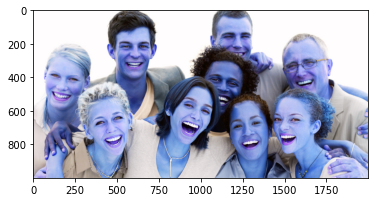

In [149]:
definirClassificadorEmCascataPorArquivo("classificadores/hearcascade_frontalface_default.xml")
faces = detectaImagemReduzidaClassificador(transformarImagemParaCinza(abrirImagem("pessoas.jpg")))
exibirImagem(abrirImagem("pessoas.jpg"))

9